In [15]:
### import libraries and load data ###

import torch as th
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# data path
df_path = (
    Path.cwd()
    / "data"
    / "raw"
    / "Jun22_2020"
    / "df3_fertsplit.csv"
)
df = pd.read_csv(df_path)[["yield", "NDVI_mean", "SAVI_mean"]]

# convert variables to PyTorch tensor
X = th.tensor(df[['NDVI_mean', 'SAVI_mean']].values, dtype=th.float32)
y = th.tensor(df[['yield']].values, dtype=th.float32)

print(f"X.shape={X.shape}, y.shape={y.shape}")

X.shape=torch.Size([58, 2]), y.shape=torch.Size([58, 1])


In [16]:
### model definition ###
in_features = 2
out_features = 1

reg_model = th.nn.Linear(in_features=in_features, out_features=out_features, bias=True)

# define loss function
mse_loss = th.nn.MSELoss()

# define optimizer
optimizer = th.optim.SGD(reg_model.parameters(), lr=0.002)

In [17]:
### model training ###
n_epoch = 6000

for i in range(n_epoch):
    # predict model with current reg param
    # forward pass
    y_pred = reg_model(X)

    #calc loss
    step_loss = mse_loss(y_pred, y)

    # backward to find derivitives of the loss function with respect to reg params
    # zero out stored gradients
    optimizer.zero_grad()
    step_loss.backward()
    # update with current step regress params
    optimizer.step()
    print(f'epoch:{i}, Loss: {round(step_loss.item(), 2)}')

epoch:0, Loss: 723692.81
epoch:1, Loss: 712643.5
epoch:2, Loss: 701767.38
epoch:3, Loss: 691061.88
epoch:4, Loss: 680524.25
epoch:5, Loss: 670152.06
epoch:6, Loss: 659942.5
epoch:7, Loss: 649893.06
epoch:8, Loss: 640001.25
epoch:9, Loss: 630264.62
epoch:10, Loss: 620680.75
epoch:11, Loss: 611247.12
epoch:12, Loss: 601961.5
epoch:13, Loss: 592821.56
epoch:14, Loss: 583825.06
epoch:15, Loss: 574969.56
epoch:16, Loss: 566253.0
epoch:17, Loss: 557673.12
epoch:18, Loss: 549227.94
epoch:19, Loss: 540915.19
epoch:20, Loss: 532732.81
epoch:21, Loss: 524678.75
epoch:22, Loss: 516751.06
epoch:23, Loss: 508947.69
epoch:24, Loss: 501266.75
epoch:25, Loss: 493706.31
epoch:26, Loss: 486264.44
epoch:27, Loss: 478939.31
epoch:28, Loss: 471729.09
epoch:29, Loss: 464631.97
epoch:30, Loss: 457646.09
epoch:31, Loss: 450769.94
epoch:32, Loss: 444001.56
epoch:33, Loss: 437339.28
epoch:34, Loss: 430781.59
epoch:35, Loss: 424326.75
epoch:36, Loss: 417973.12
epoch:37, Loss: 411719.22
epoch:38, Loss: 405563.41


<Axes3DSubplot:xlabel='$x_1$', ylabel='$x_2$'>

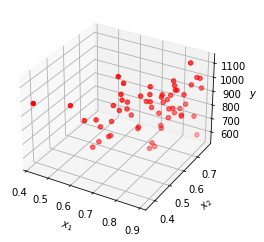

In [19]:
%matplotlib inline

def plot_data_scatter(features, targets):
    """ Plots the features and the targets in a 3D scatter plot
    
    Args:
        features: 2D numpy-array features
        targets: ltargets
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(features[:,0], features[:,1], targets, c='r')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    return ax

# regression plot
y_pred = reg_model(X).detach()
df['yhat']=y_pred.numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.plot()

plt.plot(df[x].to_numpy(), df[yhat].to_numpy(), color=colorline, linewidth=linewidth, alpha=valphaline,
#                  label='Regression line')

In [22]:
# bias b (offset of y-intercept)
reg_model.bias.item()

# weight (w)
print(reg_model.weight)

Parameter containing:
tensor([[268.4627, 237.6985]], requires_grad=True)


<AxesSubplot:>

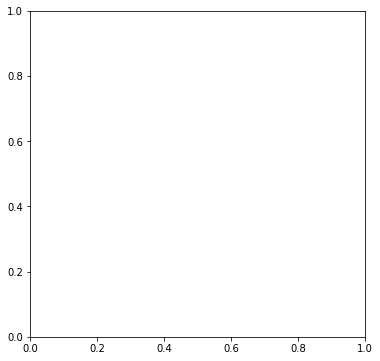

In [26]:
%matplotlib inline

# def plot_regression(features, yhat):
#   fig, ax = plt.subplots(figsize=dim)
#         plt.scatter(df[x].to_numpy(), df[y].to_numpy(), color=colordot, s=dotsize, alpha=valphadot, marker=markerdot,
#                     label='Observed data')
#         plt.plot(df[x].to_numpy(), df[yhat].to_numpy(), color=colorline, linewidth=linewidth, alpha=valphaline,
#                  label='Regression line')
#     return ax


